In [1]:
pip install numpy pandas matplotlib seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Crop_recommendation.csv")
print("First 5 rows:\n", df.head())

First 5 rows:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [7]:
print("Column Data Types:\n", df.dtypes)
print("Dataset shape:", df.shape)

Column Data Types:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object
Dataset shape: (2200, 8)


In [8]:
N_array = np.array(df['N'])
print("Nutrient N (first 5):", N_array[:5])

Nutrient N (first 5): [90 85 60 74 78]


In [9]:
print("First value of N:", N_array[0])
print("Last value of N:", N_array[-1])
print("N values from index 2 to 5:", N_array[2:5])

First value of N: 90
Last value of N: 104
N values from index 2 to 5: [60 74 78]


In [10]:
rainfall = np.array(df['rainfall'])
reshaped_rainfall = rainfall.reshape(len(rainfall), 1)
print("Reshaped Rainfall (first 5 rows):\n", reshaped_rainfall[:5])

Reshaped Rainfall (first 5 rows):
 [[202.9355362]
 [226.6555374]
 [263.9642476]
 [242.8640342]
 [262.7173405]]


In [11]:
concat = np.concatenate((N_array[:5], [100, 110]))
print("Concatenated array:", concat)

Concatenated array: [ 90  85  60  74  78 100 110]


In [12]:
split_arrays = np.split(N_array, 2)
print("Split N array (first part):", split_arrays[0][:5])

Split N array (first part): [90 85 60 74 78]


In [14]:
squared_K = np.square(df['K'])
print("Squared K values (first 5):\n", squared_K[:5])


Squared K values (first 5):
 0    1849
1    1681
2    1936
3    1600
4    1764
Name: K, dtype: int64


In [15]:
print("Mean of temperature:", np.mean(df['temperature']))
print("Max humidity:", np.max(df['humidity']))

Mean of temperature: 25.616243851779544
Max humidity: 99.98187601


In [16]:
high_ph = df['ph'] > 7
print("High pH values (first 5):", high_ph[:5])
print("Filtered ph values > 7:\n", df['ph'][high_ph][:5])

High pH values (first 5): 0    False
1     True
2     True
3    False
4     True
Name: ph, dtype: bool
Filtered ph values > 7:
 1     7.038096
2     7.840207
4     7.628473
5     7.073454
11    7.502834
Name: ph, dtype: float64


In [17]:
selected_indices = [0, 10, 20]
print("Selected N values:", N_array[selected_indices])

Selected N values: [90 91 89]


In [18]:
sorted_rainfall = np.sort(rainfall)
print("Sorted Rainfall (first 5):", sorted_rainfall[:5])

Sorted Rainfall (first 5): [20.21126747 20.36001144 20.39020503 20.49035619 20.66127836]


In [19]:
print("\nLabel (crop) value counts:\n", df['label'].value_counts())


Label (crop) value counts:
 label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [20]:
print("Row at index 1:\n", df.loc[1])
print("N, P, K columns:\n", df[['N', 'P', 'K']].head())

Row at index 1:
 N                      85
P                      58
K                      41
temperature     21.770462
humidity        80.319644
ph               7.038096
rainfall       226.655537
label                rice
Name: 1, dtype: object
N, P, K columns:
     N   P   K
0  90  42  43
1  85  58  41
2  60  55  44
3  74  35  40
4  78  42  42


In [21]:
# Null check
print("Null values:\n", df.isnull().sum())

Null values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [22]:
# Grouping: Mean rainfall by crop
grouped_rainfall = df.groupby('label')['rainfall'].mean()
print("Average Rainfall by Crop:\n", grouped_rainfall)

Average Rainfall by Crop:
 label
apple          112.654779
banana         104.626980
blackgram       67.884151
chickpea        80.058977
coconut        175.686646
coffee         158.066295
cotton          80.398043
grapes          69.611829
jute           174.792798
kidneybeans    105.919778
lentil          45.680454
maize           84.766988
mango           94.704515
mothbeans       51.198487
mungbean        48.403601
muskmelon       24.689952
orange         110.474969
papaya         142.627839
pigeonpeas     149.457564
pomegranate    107.528442
rice           236.181114
watermelon      50.786219
Name: rainfall, dtype: float64


In [23]:
# Pivot table: Avg temperature by label
pt = pd.pivot_table(df, values='temperature', index='label', aggfunc='mean')
print("Pivot Table (Average Temperature by Crop):\n", pt)

Pivot Table (Average Temperature by Crop):
              temperature
label                   
apple          22.630942
banana         27.376798
blackgram      29.973340
chickpea       18.872847
coconut        27.409892
coffee         25.540477
cotton         23.988958
grapes         23.849575
jute           24.958376
kidneybeans    20.115085
lentil         24.509052
maize          22.389204
mango          31.208770
mothbeans      28.194920
mungbean       28.525775
muskmelon      28.663066
orange         22.765725
papaya         33.723859
pigeonpeas     27.741762
pomegranate    21.837842
rice           23.689332
watermelon     25.591767


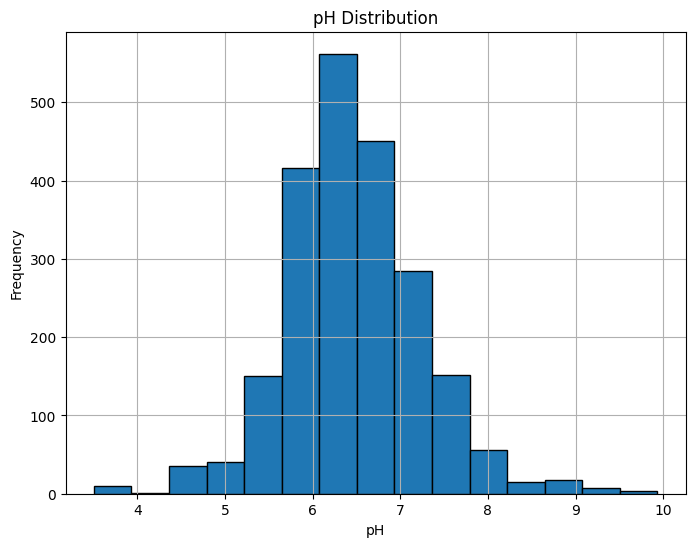

In [24]:
# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['ph'], bins=15, edgecolor='black')
plt.title('pH Distribution')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

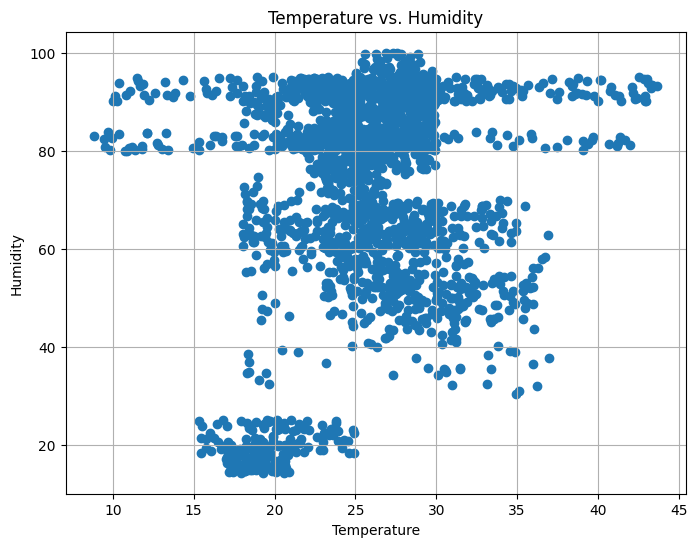

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature'], df['humidity'])
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

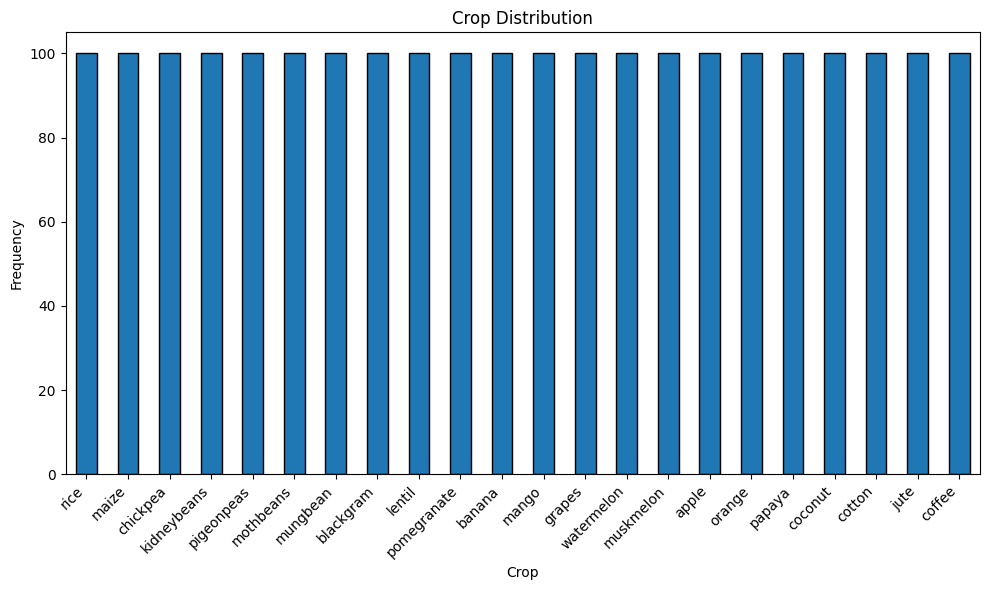

In [26]:
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Crop Distribution')
plt.xlabel('Crop')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()